<a href="https://colab.research.google.com/github/Asif-Mustafa-svg/project/blob/main/aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Concatenate, Input, Dense
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##This project has been done for the purpose of developing a novel idea for the product development lab of a Tannery to streamline and predict tensile strength so that they requires less experimentation to reach their desired state and properties to assign in leather.

In [ ]:
import pandas as pd

# Ensure the file path is correct
file_path = '/content/drive/My Drive/Lworkbook.xlsx'



df=pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


#In case of data preprocessing:


1.   Null values were assigned as zero as the chemicals amount which has been used here if it is null then the row should be null.
2.   Data Augmentation: Data were augmented



In [ ]:
new_header = df.iloc[0]  # the second row
df = df[1:]  # remove the first two rows
df.columns = new_header  # set the second row as header

print("\nDataFrame with new header:")
print(df)


DataFrame with new header:
0  Soaking_water Soaking_preservative Soda_ash Sodium_sulfide  \
1            200                 0.12     0.65           0.55   
2            250                 0.14     0.75           0.45   
3            200                 0.12     0.15            0.5   
4            200                 0.15      0.2            0.4   
5            300                 0.18     0.18           0.15   
..           ...                  ...      ...            ...   
77           340                 0.15     0.76            1.4   
78           320                 0.12     0.86              1   
79           310                 0.23     0.55            2.2   
80           380                 0.28      0.2              2   
81           NaN                  NaN      NaN            NaN   

0  sodium_carbonate(Unhairing) wetting_agent Soaking_time Soaking_pH  \
1                          1.5           0.3           90        7.5   
2                          1.4           0.3   

In [ ]:
df.head()

,Soaking_water,Soaking_preservative,Soda_ash,Sodium_sulfide,sodium_carbonate(Unhairing),wetting_agent,Soaking_time,Soaking_pH,Unhairing surfactant,Liming(Sodium_sulfide),...,pH,Shrinkge_Temperature_Ts,Tensile_strength (kg/cm2),Elongation_at_break,Bursting_strength,Ball Burst Load(kg),Distension at ball burst (mm),Tear_strength (kg/cm),Distension at grain crack (mm),Degree of tannage%
1,200,0.12,0.65,0.55,1.5,0.3,90,7.5,NaN,3,...,3.8,110,238,52,32,28,14.5,72,16,65
2,250,0.14,0.75,0.45,1.4,0.3,90,7.5,0.15,2,...,3.8,101,278,48,42,26,16.5,68,14.5,68
3,200,0.12,0.15,0.5,2,0.5,90,7.5,0.15,1.5,...,3.8,79,224,42,36,32,18,56,16,70
4,200,0.15,0.2,0.4,2.5,0.5,30,7.5,0.15,2,...,NaN,98,231,65,51,38,12.7,76,14,71
5,300,0.18,0.18,0.15,3,0.3,90,8,0.15,4,...,NaN,102,298,58,48,29.5,13.8,62,14,72


In [ ]:
df = df.replace(r'\+', '', regex=True)

# Convert all columns to numeric where possible, setting errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of their respective columns
df = df.fillna(df.mean())

# Verify changes
print("\nDataFrame after removing '+' signs and handling NaN values:")
print(df)


DataFrame after removing '+' signs and handling NaN values:
0   Soaking_water  Soaking_preservative  Soda_ash  Sodium_sulfide  \
1          200.00                 0.120  0.650000        0.550000   
2          250.00                 0.140  0.750000        0.450000   
3          200.00                 0.120  0.150000        0.500000   
4          200.00                 0.150  0.200000        0.400000   
5          300.00                 0.180  0.180000        0.150000   
..            ...                   ...       ...             ...   
77         340.00                 0.150  0.760000        1.400000   
78         320.00                 0.120  0.860000        1.000000   
79         310.00                 0.230  0.550000        2.200000   
80         380.00                 0.280  0.200000        2.000000   
81         249.25                 0.312  0.481625        0.718875   

0   sodium_carbonate(Unhairing)  wetting_agent  Soaking_time  Soaking_pH  \
1                       1.50000   

<ipython-input-6-1bc8fee02812>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'\+', '', regex=True)


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

,0
0,
Soaking_water,0
Soaking_preservative,0
Soda_ash,0
Sodium_sulfide,0
sodium_carbonate(Unhairing),0
...,...
Ball Burst Load(kg),0
Distension at ball burst (mm),0
Tear_strength (kg/cm),0


In [ ]:
import numpy as np
def add_noise(data, noise_factor=0.1):
    noise = np.random.randn(*data.shape) * noise_factor
    augmented_data = data + noise
    return augmented_data

# Original data
original_data = df.to_numpy()

# Generate augmented data until the total number of rows is 500
while original_data.shape[0] < 500:
    noise_data = add_noise(original_data, noise_factor=0.1)
    original_data = np.vstack((original_data, noise_data))

# Trim to exactly 500 rows
augmented_data = original_data[:500, :]

# Convert back to DataFrame
df1 = pd.DataFrame(augmented_data, columns=df.columns)

# Verify the shape
print(df1.shape)

(500, 147)


In [ ]:
df1.tail()

,Soaking_water,Soaking_preservative,Soda_ash,Sodium_sulfide,sodium_carbonate(Unhairing),wetting_agent,Soaking_time,Soaking_pH,Unhairing surfactant,Liming(Sodium_sulfide),...,pH,Shrinkge_Temperature_Ts,Tensile_strength (kg/cm2),Elongation_at_break,Bursting_strength,Ball Burst Load(kg),Distension at ball burst (mm),Tear_strength (kg/cm),Distension at grain crack (mm),Degree of tannage%
495,180.301504,0.529364,0.402132,0.296740,1.871237,0.655004,30.179355,7.718104,0.289858,1.819877,...,4.291803,71.959008,214.855004,48.527960,25.905843,31.941701,12.508564,81.827795,13.887796,64.906736
496,190.165678,0.708682,0.388581,-0.051207,1.343912,0.800736,29.870504,7.719334,0.141817,2.062010,...,4.194865,101.093281,265.194567,68.065678,45.189692,30.833040,17.633082,89.925087,15.326065,65.961621
497,210.211698,0.942079,0.265766,0.492867,1.748099,0.506636,30.136534,7.357832,0.130887,2.957014,...,4.299454,84.117531,274.829010,34.098748,35.846737,34.992985,21.726804,61.150417,17.900296,77.812442
498,219.981386,0.517450,0.494340,0.557062,1.721693,0.626305,30.030079,7.411476,0.113779,2.504560,...,4.142984,103.753231,287.275030,47.874970,41.880320,28.006109,20.328884,54.989938,21.012219,96.917607
499,250.143737,0.271879,0.357615,0.451060,1.398303,0.391409,90.117647,7.314083,0.226361,2.014966,...,4.117817,81.798070,298.109816,27.015841,23.277207,27.046806,15.929135,37.719689,16.906709,71.488493


In [ ]:
output_file_path = '/content/drive/My Drive/Augmented_Lworkbook.xlsx'
df1.to_excel(output_file_path, index=False)

In [ ]:
df1.isnull().sum()

,0
0,
Soaking_water,0
Soaking_preservative,0
Soda_ash,0
Sodium_sulfide,0
sodium_carbonate(Unhairing),0
...,...
Ball Burst Load(kg),0
Distension at ball burst (mm),0
Tear_strength (kg/cm),0


In [ ]:
import statsmodels.api as sm

# Drop the target variable from the features
X = df1.drop(columns=['Tensile_strength (kg/cm2)'])
y = df1['Tensile_strength (kg/cm2)']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Tensile_strength (kg/cm2)   R-squared:                       0.985
Model:                                   OLS   Adj. R-squared:                  0.978
Method:                        Least Squares   F-statistic:                     153.9
Date:                       Mon, 30 Dec 2024   Prob (F-statistic):          4.76e-257
Time:                               07:12:09   Log-Likelihood:                -1639.5
No. Observations:                        500   AIC:                             3573.
Df Residuals:                            353   BIC:                             4193.
Df Model:                                146                                         
Covariance Type:                   nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:


# Define features and target variable
X = df1.drop(columns=['Tensile_strength (kg/cm2)'])
y = df1['Tensile_strength (kg/cm2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8.370954408168831
Mean Squared Error (MSE): 107.38666108514191
R-squared (R²): 0.9524491000515625


In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LinearRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.9795606  0.98035971 0.96716953 0.96398985 0.95638197]
Mean Cross-Validation R² Score: 0.9694923338575219


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.020236404262712
Mean Squared Error (MSE): 64.20767948101123
R-squared (R²): 0.9715687878543665


In [ ]:
X = df1.drop(columns=['Tensile_strength (kg/cm2)'])
y = df1['Tensile_strength (kg/cm2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.85472855637954
Mean Squared Error (MSE): 299.2700093672754
R-squared (R²): 0.8674829990131778


In [ ]:
X = df1.drop(columns=['Tensile_strength (kg/cm2)'])
y = df1['Tensile_strength (kg/cm2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 19.143011750397747
Mean Squared Error (MSE): 752.3873091270607
R-squared (R²): 0.6668422940311987


In [ ]:
X = df1.drop(columns=['Tensile_strength (kg/cm2)'])
y = df1['Tensile_strength (kg/cm2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.020236404262712
Mean Squared Error (MSE): 64.20767948101123
R-squared (R²): 0.9715687878543665


In [ ]:
base_model = DecisionTreeRegressor(max_depth=20)
model = AdaBoostRegressor(base_model, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.065002654423119
Mean Squared Error (MSE): 8.326016093660524
R-squared (R²): 0.9963132333733252


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 37103.4453 - val_loss: 15115.3184
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8948.9600 - val_loss: 6844.1626
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4440.8550 - val_loss: 3115.2505
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1512.8313 - val_loss: 1439.9902
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1038.7938 - val_loss: 1426.6421
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 695.4921 - val_loss: 1212.2776
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 547.7843 - val_loss: 837.1630
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 359.0017 - val_loss: 872.2882
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 222.6086 - val_loss: 937.9367
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.3639 - val_loss: 795.6107
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 264.3062 - val_loss: 779.5826
Epoch

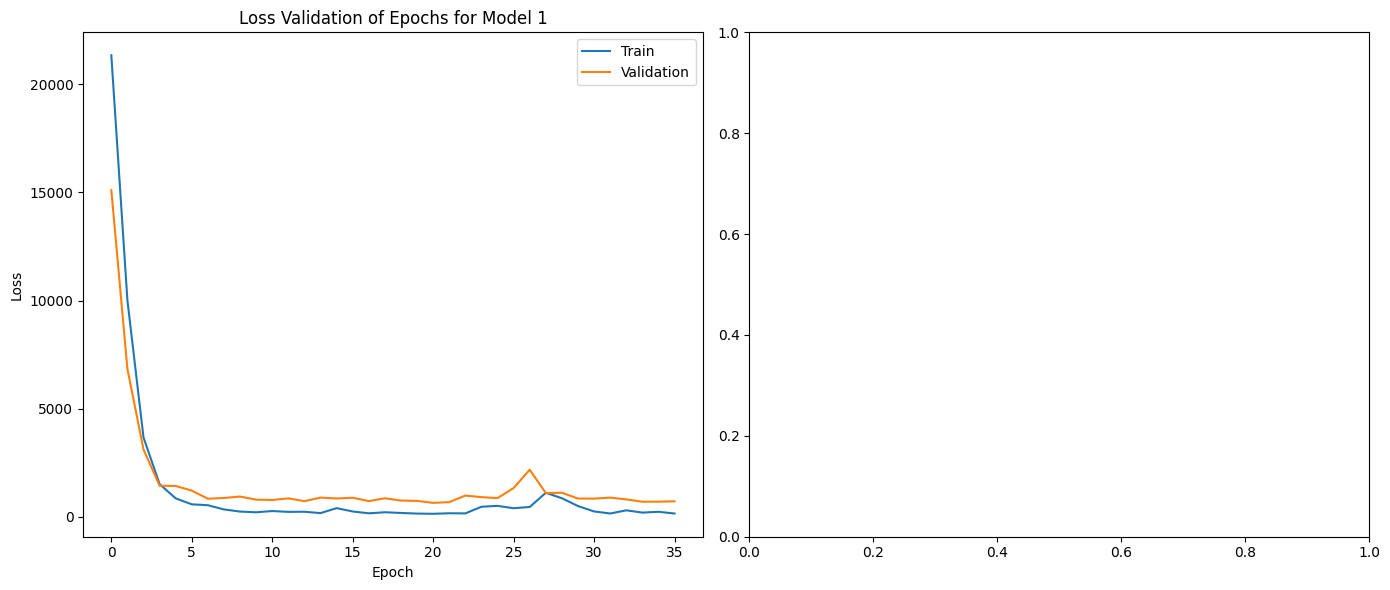

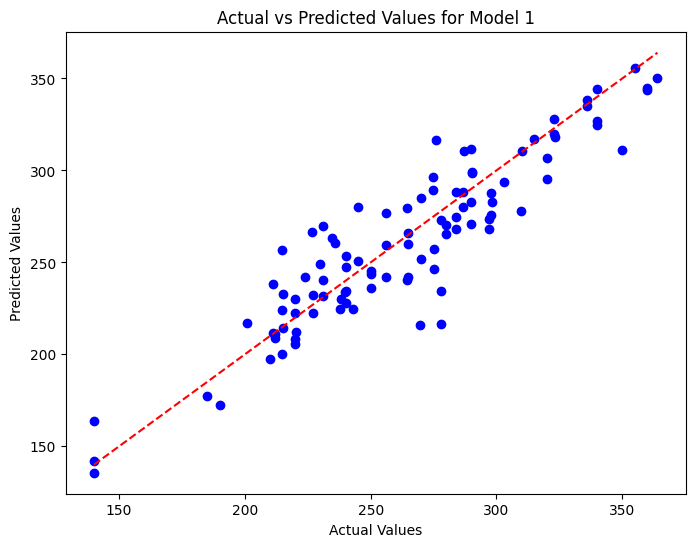

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(64, activation='relu'))  # Third hidden layer
model.add(Dense(32, activation='relu'))  # Fourth hidden layer
model.add(Dense(32, activation='relu'))  # Fifth hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Validation of Epochs for Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
if 'mae' in history.history:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Model 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 46158.2734 - val_loss: 9606.2012
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7722.5957 - val_loss: 2991.2729
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3133.9824 - val_loss: 2179.6848
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1460.2527 - val_loss: 1342.4216
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 698.0632 - val_loss: 972.6254
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 338.6321 - val_loss: 903.1985
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 301.8158 - val_loss: 673.4277
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 182.5788 - val_loss: 717.9465
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.4798 - val_loss: 943.3593
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 213.1160 - val_loss: 656.2490
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.2106 - val_loss: 732.6344
Epoch 12/100
20/20 ━

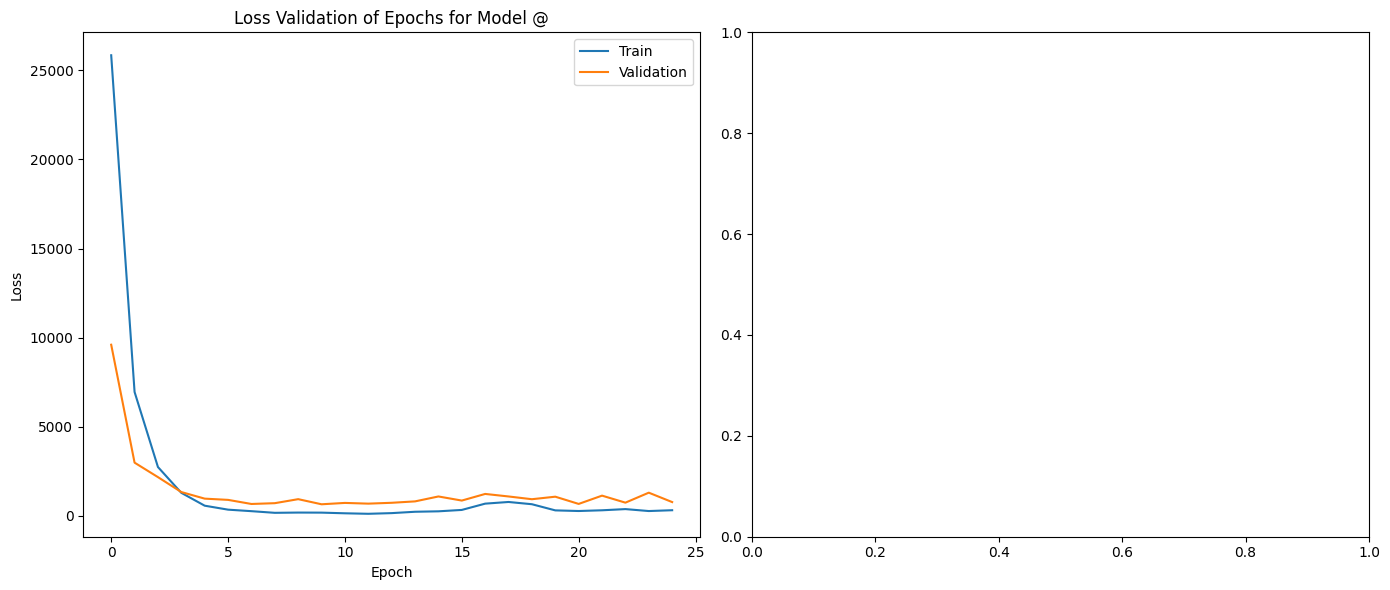

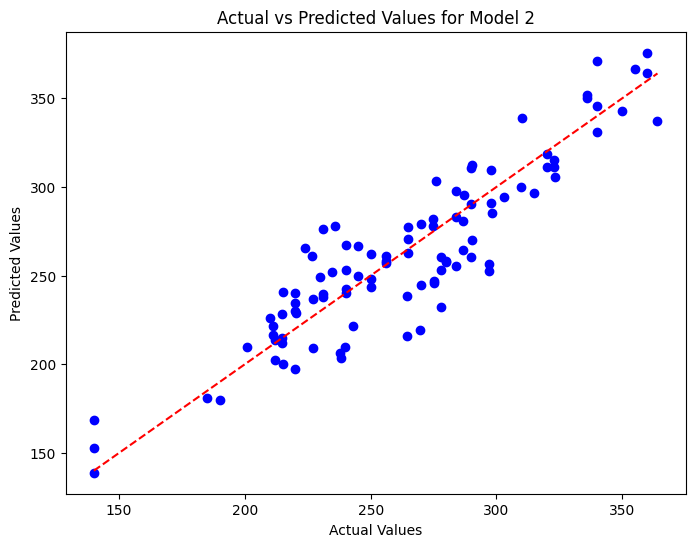

In [ ]:
model = Sequential()
model.add(Dense(124, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(64, activation='relu'))  # Third hidden layer
model.add(Dense(32, activation='relu'))  # Fourth hidden layer
model.add(Dense(32, activation='relu'))  # Fifth hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Validation of Epochs for Model @')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
if 'mae' in history.history:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Model 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 74278.7656 - val_loss: 73641.1328
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73874.3672 - val_loss: 73534.5703
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72350.0156 - val_loss: 73430.8594
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71331.2422 - val_loss: 73296.5781
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72597.6328 - val_loss: 73033.7656
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71949.8984 - val_loss: 72728.7734
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72497.0234 - val_loss: 72357.2344
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71152.3359 - val_loss: 72110.2812
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73200.3594 - val_loss: 71752.4766
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69621.6484 - val_loss: 71355.1641
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69413.17

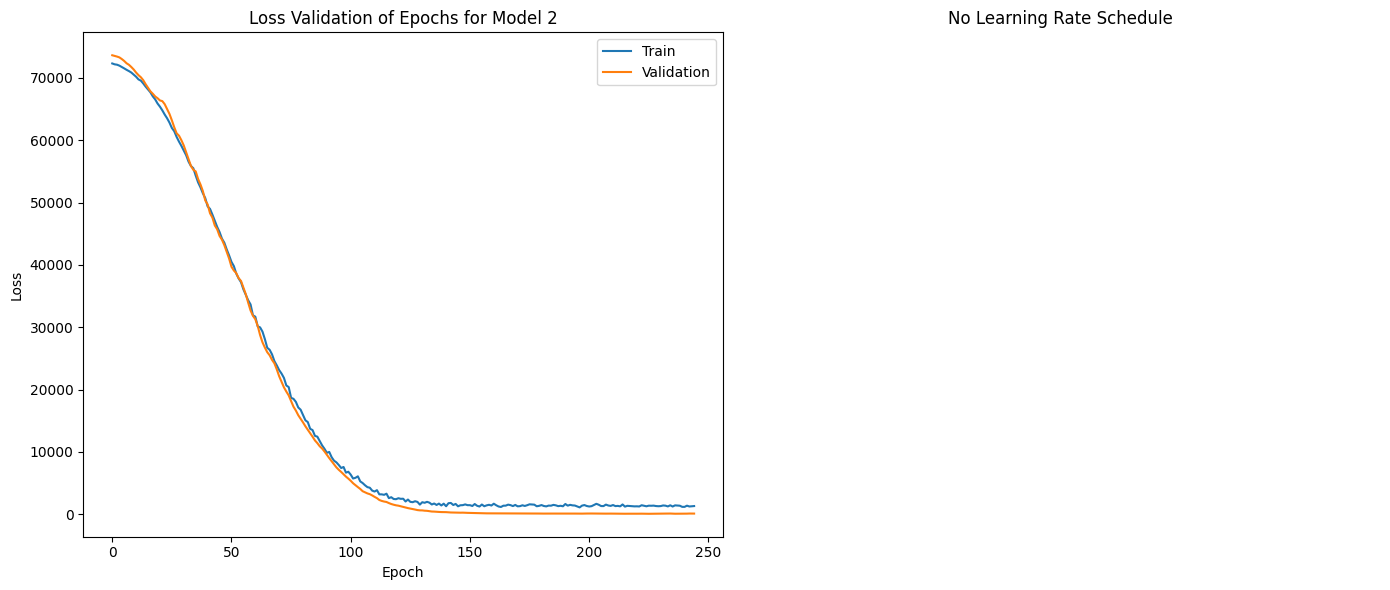

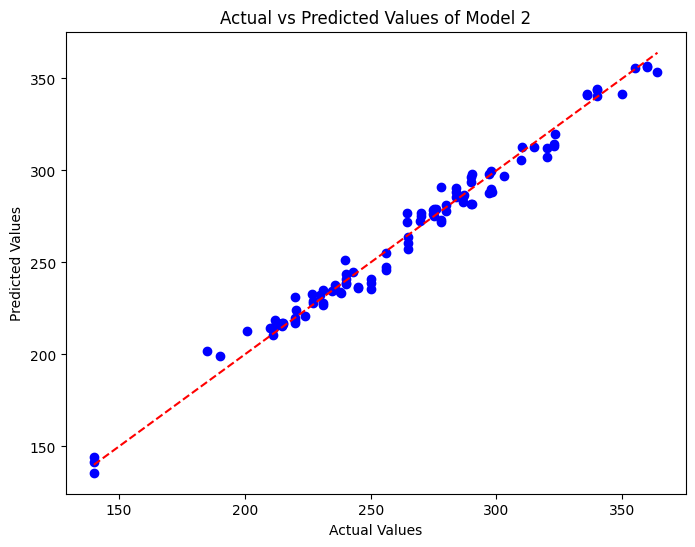

ValueError: Data must be 1-dimensional, got ndarray of shape (100, 100) instead

In [ ]:
model = Sequential()
model.add(Dense(156, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Validation of Epochs for Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Learning Rate Schedule if applicable
# Plot will be empty if not using learning rate schedule
if 'lr' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
else:
    plt.subplot(1, 2, 2)
    plt.title('No Learning Rate Schedule')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values of Model 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
input_layer = Input(shape=(X_train.shape[1],))

# Wide component (linear model)
wide_layer = Dense(1, activation='linear')(input_layer)

# Deep component (neural network)
deep_layer = Dense(64, activation='relu')(input_layer)
deep_layer = Dense(32, activation='relu')(deep_layer)
deep_layer = Dense(16, activation='relu')(deep_layer)

# Concatenate wide and deep components
concatenated_layer = Concatenate()([wide_layer, deep_layer])
output_layer = Dense(1)(concatenated_layer)  # Output layer for regression

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Validation of Epochs for Model 4')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Learning Rate Schedule if applicable
# Plot will be empty if not using learning rate schedule
if 'lr' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
else:
    plt.subplot(1, 2, 2)
    plt.title('No Learning Rate Schedule')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values of Model 4')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 60856.4922 - val_loss: 13793.7891
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9907.5996 - val_loss: 4016.0176
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2582.6685 - val_loss: 1934.9369
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 951.1736 - val_loss: 1434.2136
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 730.3267 - val_loss: 1086.1702
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 428.7577 - val_loss: 1029.2854
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300.5041 - val_loss: 845.8076
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254.3908 - val_loss: 863.2836
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.6740 - val_loss: 768.1597
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.3913 - val_loss: 739.3570
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125.7817 - val_loss: 753.9703
Epoch 1

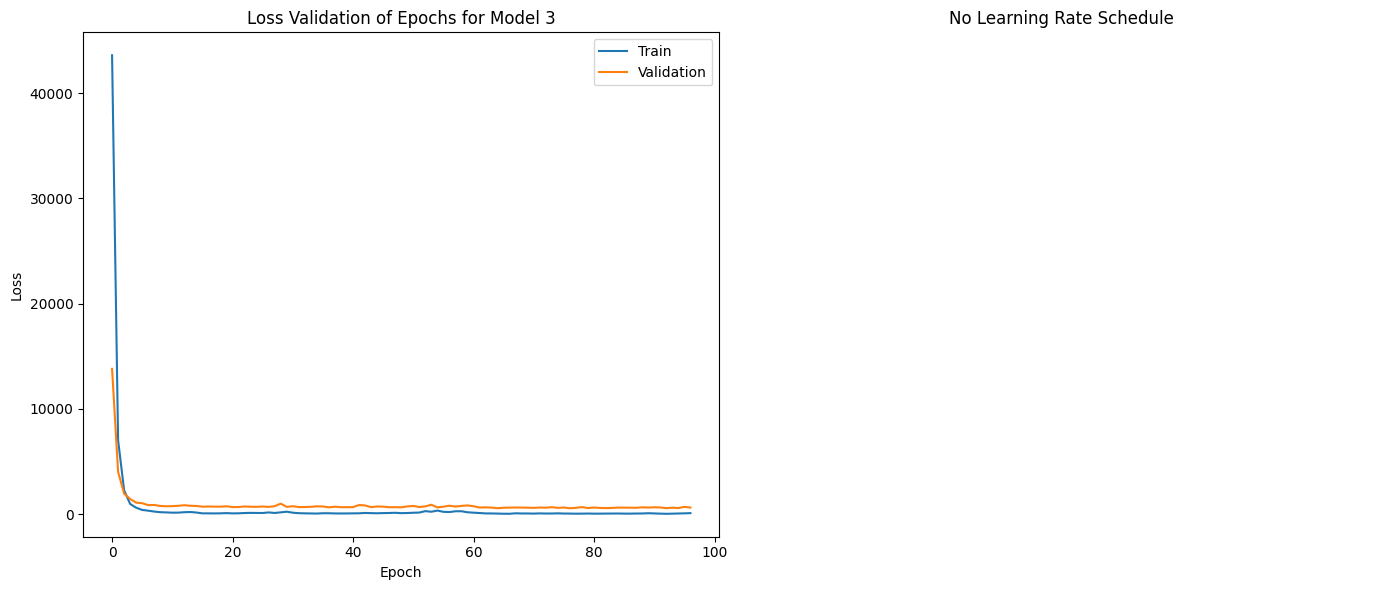

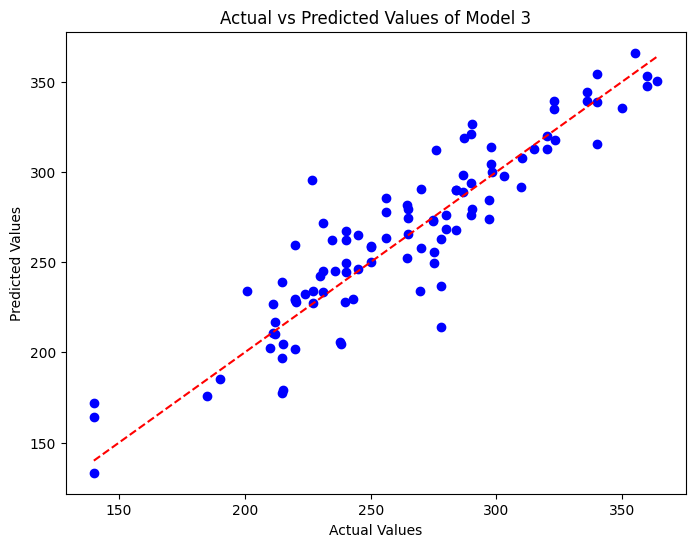

ValueError: Data must be 1-dimensional, got ndarray of shape (100, 100) instead

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training & validation loss values
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Validation of Epochs for Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot Learning Rate Schedule if applicable
# Plot will be empty if not using learning rate schedule
if 'lr' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
else:
    plt.subplot(1, 2, 2)
    plt.title('No Learning Rate Schedule')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values of Model 3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
df1.head()

In [ ]:
df1.columns

In [ ]:
# Assuming 'data' is your 500x160 dataset and 'shrinkage_temp' is the target column
X = df1.drop('Shrinkge_Temperature_Ts', axis=1)
y = df1['Shrinkge_Temperature_Ts']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost model
base_model = DecisionTreeRegressor(max_depth=4)  # Base estimator
adaboost = AdaBoostRegressor(base_model, n_estimators=100, random_state=42)

# Fit the model
adaboost.fit(X_train, y_train)

# Predict on test data (optional)
y_pred = adaboost.predict(X_test)

In [ ]:
# Extract feature importances
feature_importances = adaboost.feature_importances_

# Sort feature importances in descending order
importances_sorted_idx = feature_importances.argsort()[::-1]
sorted_features = X.columns[importances_sorted_idx]

# Print the most important features
for idx in importances_sorted_idx:
    print(f"Feature: {X.columns[idx]}, Importance: {feature_importances[idx]}")


In [ ]:
scaler=StandardScaler()
df2= pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
print(df2)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example dataset with 160 features and 500 samples
X = df2.drop('Shrinkge_Temperature_Ts', axis=1)
y = df2['Shrinkge_Temperature_Ts']  # Target shrinkage temperatures (between 80°C to 90°C)

# Define the target shrinkage temperature
target_temperature = 100

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a regression model (Random Forest) to predict shrinkage temperature based on features
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ACO parameters
num_ants = 100  # Number of ants (candidate solutions)
num_iterations = 100  # Number of iterations
evaporation_rate = 0.5  # Pheromone evaporation rate
num_features = X.shape[1]  # Number of features (160 in this case)
pheromones = np.ones(num_features)  # Initial pheromone levels (one per feature)
alpha = 1  # Influence of pheromone on decision-making
beta = 5   # Influence of heuristic information (feature importance, not used here)
heuristics = np.ones(num_features)  # Dummy heuristic values (can be replaced with feature importance)

# Define the range of each feature (min, max), assuming features are normalized
feature_ranges = [(0, 1)] * num_features  # Feature range for each feature

# Fitness function to evaluate how close a solution is to the target temperature
def fitness_function(feature_values):
    # Predict the shrinkage temperature using the trained model
    predicted_temperature = model.predict([feature_values])[0]
    # Calculate the absolute error between predicted and target temperature
    return abs(predicted_temperature - target_temperature)

# Function to calculate the probability of choosing a feature value based on pheromones and heuristics
def calculate_probabilities(pheromones, heuristics, alpha, beta):
    pheromones_weighted = pheromones ** alpha
    heuristics_weighted = heuristics ** beta
    combined = pheromones_weighted * heuristics_weighted
    return combined / np.sum(combined)

# Main ACO loop
best_solution = None
best_error = float('inf')

# Iterative process where ants search for the optimal solution
for iteration in range(num_iterations):
    all_ants_solutions = []  # To store solutions generated by all ants in this iteration
    all_ants_errors = []  # To store errors of all solutions

    for ant in range(num_ants):
        # Each ant generates a candidate solution (feature values)
        feature_values = []
        for i in range(num_features):
            # Generate a value for each feature within the allowed range
            prob = calculate_probabilities(pheromones, heuristics, alpha, beta)[i]
            feature_value = np.random.uniform(feature_ranges[i][0], feature_ranges[i][1]) * prob
            feature_values.append(feature_value)

        # Evaluate the fitness of the solution
        error = fitness_function(feature_values)
        all_ants_solutions.append(feature_values)
        all_ants_errors.append(error)

        # Update the best solution found so far
        if error < best_error:
            best_error = error
            best_solution = feature_values

    # Update pheromones based on the performance of the solutions
    pheromones = (1 - evaporation_rate) * pheromones  # Evaporation
    for i, error in enumerate(all_ants_errors):
        pheromone_update = 1 / (error + 1e-6)  # Avoid division by zero
        for j in range(num_features):
            pheromones[j] += pheromone_update

    # Print progress
    print(f"Iteration {iteration + 1}, Best Error: {best_error}")

# Final solution
print("Best solution found (feature values):", best_solution)
print(f"Shrinkage temperature achieved: {100 - best_error:.2f}°C")
